# Classification With Multiple Models

We will learn how to solve a classification problem through the use of multiple classification model algorithms. In conjunction we will perform a cross validation grid search, looping through different models to find the model and it's hyper-parameter set with the highest perforformance based on the current state of the data. We will use this model to predict `species` of a flower using the iris dataset.

## Overview: 
1. Import the dataset
2. Separate the dataset's features from target variable
3. Split data into training and testing sets
4. Make a dictionary called `pipelines_dict` to store multiple pipelines, one for each algorithm 
5. Make multiple hyper-parameter dictionaries, one for each algorithm
6. Make a dictionary called `hyper_parameters_dict` to hold all hyper-parameter dictionaries
7. Make a dictionary called `best_performing_models_dict` to populate and store the highest perfoming models during the cross validation grid search loop 
8. Create a loop to perform multiple cross validaton grid searches, one for each algorithm using the training set. Setting the following parameters of the `GridSearchCV` object initialization:
  - `estimator` parameter will be assigned with one of the `pipeline` object instances with respect to a specific algorithm selected for the current loop iteration as its argument
  - `param_grid` parameter will be assigned with one of the `hyper-parameter-dictionary` instances with respect to a specific algorithm selected for the current loop iteration as its argument
9. Identify the highest performing algorithm with its hyper-parameters set using the training set
10. Evaluate the best performing model using the testing data
11. Using the best performing model predict values and compare those results to the real values
<hr>

<br>

## Import Required Libraries

**Note:** You can tell the difference between a class and a function by the case sensivity. 

- A **class** will be captialized
- A **function** will be lowercase
- A **method**, or a function belonging to a class, will also be lowercase. You can call a method by invoking it through an instance of a class (instance method), or through a class definition (static method)

References: 
- [Understanding what a class is](https://www.hackerearth.com/practice/python/object-oriented-programming/classes-and-objects-i/tutorial/)
- [Differences between functions and methods](https://www.tutorialspoint.com/difference-between-method-and-function-in-python)
- [Different types of methods](https://www.bogotobogo.com/python/python_differences_between_static_method_and_class_method_instance_method.php)

In [0]:
# Collection libraries 
import numpy as np
import pandas as pd

# Visual libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Helper for splitting training and testing data
from sklearn.model_selection import train_test_split

# Models/Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Helper for pipelines
from sklearn.pipeline import make_pipeline

# Helper for normailizing dataset
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

#### Notes about imports with this notebook:
We will re-import some of the libraries when we use these modules, this is to get you used to importing and understanding their classes and functions. Reference the documentation to understand the libraries classes, methods, and functions. 

## Load Data

<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/machine-learning/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science\ Track/machine-learning

<hr> 
<br>

### Import Iris Dataset
Read in the iris dataset using the path provided and store it in a variable called `df`.

#### Import the Iris dataset
- Use pandas' `read_csv` function

#### Pandas' `read_csv` parameters:
- `filepath_or_buffer` (string): path of csv to import

```python 
filepath_or_buffer = './data/Iris.csv'
```

In [0]:
df = pd.read_csv(filepath_or_buffer = './data/Iris.csv')

### Show Head Of Datset

In [0]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Show Tail Of Dataset

In [0]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr> 

<br>

## Separate the dataset's features from the target variable

**Tasks:**
- Print shape of original DataFrame before manipulating the DataFrame
- Create a new DataFrame called `X` to contain only the features 
- Create a new DataFrame called `y` to contain only the labels

<br>

### Question: 
Why would you split the data this way?



Answer:

We will do this to separate the features of the dataset from the target value. For our problem we will set the `Species` as the target variable for this machine learning model, because we want to predict the species based on a selected amount of other features of the dataset.     

<br>

### Print Shape Of Original DataFrame
We will do this to confirm our manipulations later


In [0]:
df.shape

(150, 5)

### Create A DataFrame Called `X` To Hold All The Features
**Note:** `X` is uppercase because it's a 2D array / matrix. A matrix can hold multiple rows and more than one column. 

**Tip:** Consider using the DataFrame's `drop` method to create this new DataFrame


#### DataFrame's `drop` method parameters:
- `labels` (string or list of strings): index or a  column labels to drop
- `axis`  ({0 or ‘index’, 1 or ‘columns’}): default 0; whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
- `inplace` (bool): default False; If True, do operation inplace and return None.



In [0]:
X = df.drop(labels="Species", axis=1)

#### Show Shape of `X` to make sure we created the features DataFrame correctly:

It should have 150 rows and 4 columns

In [0]:
X.shape

(150, 4)

### Print Head Of Features Matrix `X`

In [0]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create A Series Called `y` To Hold All The Labels
**Note:** `y` is lowercase because it's Series, meaning can hold multiple rows with only one column per row.



In [0]:
y = df.loc[:, 'Species']

#### Show Shape of `y` to make sure we created the target series correctly:

It should have 150 rows and 1 column

**Note:** the shape will print out like this, `(150,)` which means that is has 150 rows and 1 column.

In [0]:
y.shape

(150,)

### Print Head Of Label Series `y`

In [0]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

<hr>
<br>

## Split Data Into Training And Testing 

Even though we will perform cross validation in the near future we will still want to split the dataset in to a training and testing set. We do this so that after we find the best estimator, or best fitted model, through utilizing the training data with a specific hyper-parameters values, we can evaluate the model using unseen testing data. This will allow us to understand if the model is overfitting or underfitting. 

Additional Resources:
- [Learn more about overfitting and underfitting](https://github.com/SoftStackFactory/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb)
- [Interested in how to better fit a model?](https://github.com/SoftStackFactory/PythonDataScienceHandbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb)

**Note:** The second resource is very informative about feature engineering, but we specifically want to emphasize the **Derived Features** section. 


#### Split Data Into Training And Testing Sets Using `train_test_split` function
 
Requirements: 
- pass in `0.20` as the argument for the `test_size` parameter
- pass in `1` as the argument for the `random_state` parameter

**Note:** We set the `random_state` parameter to a unique argument value so that when we run this notebook multiple times or using different computers we will recieve the same split of data, which is important for re-running experiments and simulations.

[`train_test_split` function documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### Import `train_test_split` Function From Sklearn's Library

In [0]:
# Helper for splitting training and testing sets
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<hr>

<br>

## Cross Validation Recap
One disadvantage of using a holdout set, or in other words a static split of data for model validation is that we have lost a portion of our data to the model training. In this case some of the dataset would not contribute to the training of the model, saying we don't use cross validation and stick with splitting the data only once. This is not optimal, and can cause problems – especially if the initial set of training data is small.

We will be using cross validation in conjunction to splitting the data using the `train_test_spit` function. We will do this so that we are not training and testing our model's evaluation with the same data, meaning we will eventually want to have our model get scored using unseen data to get a feel for how the model is performing.

<br>

### Perform A Cross Validation Grid Search 
A Grid Search Cross Validation is an exhaustive search over specified hyper-parameter values to find the most performant estimator with a specific hyper-parameter set. 

<br>

#### To perform a cross validation grid search on each machine learning algorithm we need to construct the following:
- Pipeline object, one for each algorithm 
- Model hyper-parameter dictionary, one for each algorithm

<br>

Think of a Pipeline object as production line of transforming `features`, or X DataFrame, before eventually fitting the model. It's important to know that each argument of the pipeline, each transformer object, that will transform the `features` data, must have the following methods implemented:
- `fit()` 
- `fit_transform()`

<br>

In summary the pipeline will pre-process any `features` data provided to it before fitting the model. We will accomplish this by calling the first parameter's `fit_transform` method. The output of the first object's `fit_transform` method will be passed automatically to the next parameter's `fit_transform` method, and so on. Eventually the output of the last transformer object's `fit_transform` method will be passed to the `fit()` method of the estimator object.

#### Rundown of what is conceptually happening:

``` python 
def process_of_pipeline(self, Features, labels):
  Features_transformed = Features
  for name, transformer_object: in self.steps[:-1]:
    Features_transformed = transformer_object.fit_transform(Features_transformed, labels)
  estimator = self.steps[-1][1]
  estimator.fit(Features_transformed, labels) # The last step is the estimator, fit the model after all the transformation operations are complete
```

**Note:** `Features` is capitalized because it's a 2D Matrix, which can interchangably be refered to as a DataFrame, or many rows of data each containing multiple columns of data points. While `labels` should be thought of as a Series, because each row only has one column to hold a singular data point.


[For a better understanding check out this video](https://www.youtube.com/watch?v=6zk6uQSuXqs)

[`GridSearchCV` Class's Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<br>

### Make Pipelines, One For Each Model Algorithm

We will start by tranforming the `features` matrix data using the `StandardScalar` object's `fit_transform()` method, which will normalize all of the data. We will then pass the transformed `features` matrix into the estimator's `fit` method along with the unmodified `labels` series as parameters.

#### Import The Following Libraries From Sklearn's Library
- `make_pipeline` function, which will help us create a pipeline object
- `StandardScalar` class, which will normalize the dataset
- `LogisticRegression` estimator class 
- `KNeighborsClassifier` estimator class
- `SVC` estimator class
- `GradientBoostingClassifier` estimator class 
- `RandomForestClassifier` estimator class 

**Remember:** You can tell the difference between a class and a function by the case sensivity

- A **class** will be captialized
- A **function** will be lowercase

In [0]:
# Helper for pipelines
from sklearn.pipeline import make_pipeline

# Helper for normailizing dataset
from sklearn.preprocessing import StandardScaler

# Models/Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

Resources:
- [Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [K Neighbors Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
- [Support Vector Classification Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- [Gradient Boosting Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)
- [Random Forest Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

### Create Pipeline Dictionary
Create a dictionary called `pipelines_dict` to hold multiple pipeline objects. The `key` of the dictionary should be the model's name and the `value` should be an instanciated pipeline object, which can be made by invoking the `make_pipeline` function. We will create a key and value pair for each estimator.

<br>

#### Understanding A Dictionary
A `dictionary` is an unordered collection of data values, used to store data values like a map, which unlike other Data Types that hold only single value as an element, a dictionary holds `key:value` pair. A dictionary has a `key`, and each key maps to a `unique value`. A dictionary is useful when you are trying locate a specific value based on a key in a collection, opposed to iterating over an array/list to get to find specific value. Picture that you have to cycle through a really long list of items just to find the one you were looking for. Is cycling through all those items really necessary? Technically speaking cycling through a list takes longer time and more computer performance, something we need to be mindful of when working with machine learning with big data. A dictionary allows us to quickly access a value based on a unique key, without having to iterate, or cycle, through all elements in this collection.

It's a good time to mention that values of dictionaries can be dictionaries themselves. 

[Dictionary reference](https://www.geeksforgeeks.org/python-dictionary/)

<br> 

#### Use The `make_pipeline()` Function To Set `Values` Of The Dictionary:
- The `keys` should be the estimator's name. 
- Pass in an instanciated `StandardScalar` object as the first argument to the `make_pipeline` function
- Pass in an instanciated estimator object as the second argument to the `make_pipline` function

**Note:** Both the `StandardScalar` and `estimator` objects will be instanciated with no parameters being passed into their constructor function

**Note:** We will make multiple dictionaries so it is important to keep using the same `key`, so that later we can use a `key` to access values from multiple dicitonaries.

In [0]:
pipelines_dict = {
    "logistic_regression": make_pipeline(StandardScaler(), LogisticRegression()),
     "k_neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "svc": make_pipeline(StandardScaler(), SVC()),
    "gradient_boosting": make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    "random_forest": make_pipeline(StandardScaler(), RandomForestClassifier())
}

<br>

### Make Multiple Hyper-Parameter Dictionaries
One for each machine learning estimator algorithm.

**Hint:**
You can find out what hyper-parameters an estimator has by using the pipeline object's `get_params` method. This will return a dictionary. 

<br>

#### To view the pipeline dictionary, print the dictionary using a pipeline object's `get_params` method: 
```python
# logistic regression pipeline's paramater dicitonary
pipelines_dict['logistic_regression'].get_params()
```
**Note:** We will access a pipeline object through using bracket notation to access a value from the `pipelines_dict` dictionary. The key will go inside the brackets to return the desired value, a pipeline object.

[Accessing Dictionary Values Reference](https://realpython.com/python-dicts/#accessing-dictionary-values)


#### Print The Logistic Regression Pipeline Parameters Using The Pipeline's `get_params` method

In [0]:
# logistic regression pipeline's paramater dictionary
pipelines_dict['logistic_regression'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'warn',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'warn',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=T

#### Invoke the `keys` method on the logistic regression pipeline's parameter dictionary to view all of the pipeline's parameter names

```python
# logistic regression pipeline's parameter dicitonary keys
pipelines_dict['logistic_regression'].get_params().keys()
```

In [0]:
# logistic regression pipeline's parameter dicitonary keys
pipelines_dict['logistic_regression'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

#### Invoke the `values()` method on the logistic regression pipeline's parameter dictionary to view all the  pipeline's parameter values
```python
# logistic regression pipeline dicitonary values
pipelines_dict['logistic_regression'].get_params().values()
```

In [0]:
# logistic regression pipeline dicitonary values
pipelines_dict['logistic_regression'].get_params().values()

dict_values([None, [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))], False, StandardScaler(copy=True, with_mean=True, with_std=True), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), True, True, True, 1.0, None, False, True, 1, None, 100, 'warn', None, 'l2', None, 'warn', 0.0001, 0, False])

### Create Multiple Dictionaries To Hold The Different Hyper-Parameters For Each Indvidual Estimator

For each dictionary:
- Name the dictionary with respect to the model name
- The `key` will be a unique estimator hyper-parameter name
- The `value` will be an array, filled with multiple unique values for that specific hyper-parameter

#### <span style="color:red"> Important Note: </span>
When creating an estimator's hyper-parameter dictionary we need to make sure we are using the pipeline object's dictionary `keys`, not the actual estimator object's dictionary `keys` **i.e.** `LogisticRegression()`. 
 
##### Don't Do:

<del>

```python 
# Do not use the actual estimator object's keys
LogisticRegression().get_params().keys()

logistic_regression_hyper_parameter_dict = {
  'fit_intercept': [True, False] # When we fit, an error will occur
}
```

</del>

When we perform fitting the model with the following hyper-parameters we will get the following error if we do not use the proper hyper-parameter names:

```ValueError: Invalid parameter fit_intercept for estimator Pipeline```

This is because we need to use the pipeline's hyper-parameters naming convention instead: 

```python 
# Get Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to naming conventions sklearn follows
pipelines_dict['logistic_regression'].get_params().keys()

# Use Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to the naming conventions sklearn follows
logistic_regression_hyper_parameter_dict = {
    'logisticregression__fit_intercept': [True, False],
}
```

**Note:** `logisticregression__fit_intercept` is the correct key name rather  than `fit_intercept`


#### Create Logistic Regression Hyper-Parameter Dictionary
##### Print all possible logistic regression's pipeline parameters to find out which hyper-parameters can be set for this specific estimator

In [0]:
print(pipelines_dict['logistic_regression'].get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])


##### Create a logistic regression hyper-parameter Dictionary
**Remember:** use the pipeline's hyper-parameter options instead of estimator's hyper-parameter options

In [0]:
# Use Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to the naming conventions sklearn follows
logistic_regression_hyper_parameter_dict = {
    'logisticregression__random_state': [1],
    'logisticregression__fit_intercept': [True, False],
    'logisticregression__penalty': ['l2', 'none'],
    'logisticregression__class_weight': ['balanced', 'none'],
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], # 'liblinear' removed because can't co-exist with the penalty of None
    'logisticregression__warm_start': [True, False],
    'logisticregression__n_jobs': [-1]
}

#### Create K Neighbors Hyper-Parameter Dictionary
##### Print all possible k neighbor's pipeline parameters to find out which hyper-parameters can be set for this specific estimator

In [0]:
print(pipelines_dict['k_neighbors'].get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'kneighborsclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])


##### Create a k neighbors hyper-parameter Dictionary
**Remember:** use the pipeline's hyper-parameter options instead of estimator's hyper-parameter options 

In [0]:
# Use Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to the naming conventions sklearn follows
k_neighbors_hyper_parameter_dict = {
    'kneighborsclassifier__n_neighbors': [1, 2, 3],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__leaf_size' : [20 ,30, 40],
    'kneighborsclassifier__p': [1, 2, 3],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], # 'wminkowski', 'seuclidean', 'mahalanobis' removed due to "__init__() takes exactly 1 positional argument (0 given)"
    'kneighborsclassifier__n_jobs': [-1]
}

#### Create SVC Hyper-Parameter Dictionary
##### Print all possible svc's pipeline parameters to find out which hyper-parameters can be set for this specific estimator

In [0]:
print(pipelines_dict['svc'].get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])


##### Create a svc hyper-parameter Dictionary
**Remember:** use the pipeline's hyper-parameter options instead of estimator's hyper-parameter options 

In [0]:
# Use Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to the naming conventions sklearn follows
svc_hyper_parameter_dict = {
    'svc__random_state': [1],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # deleted precomputed
    'svc__class_weight': ['balanced'],
    'svc__degree': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__gamma': ['scale', 'auto'],
    'svc__shrinking': [True, False],
    'svc__probability': [True, False]
    }

#### Create Gradient Boosting Hyper-Parameter Dictionary
##### Print all possible gradient boosting's pipeline parameters to find out which hyper-parameters can be set for this specific estimator

In [0]:
print(pipelines_dict['gradient_boosting'].get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'gradientboostingclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', 'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', 'gradientboostingclassifier__max_depth', 'gradientboostingclassifier__max_features', 'gradientboostingclassifier__max_leaf_nodes', 'gradientboostingclassifier__min_impurity_decrease', 'gradientboostingclassifier__min_impurity_split', 'gradientboostingclassifier__min_samples_leaf', 'gradientboostingclassifier__min_samples_split', 'gradientboostingclassifier__min_weight_fraction_leaf', 'gradientboostingclassifier__n_estimators', 'gradientboostingclassifier__n_iter_no_change', 'gradientboostingclassifier__presort', 'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', 'gradientboostingclassifier__tol', 'gradientboostingclassifier__valid

##### Create a gradient boosting hyper-parameter Dictionary
**Remember:** use the pipeline's hyper-parameter options instead of estimator's hyper-parameter options 

In [0]:
# Use Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to the naming conventions sklearn follows
gradient_boosting_hyper_parameter_dict = {
    'gradientboostingclassifier__random_state': [1],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.5, 0.7, 1, 2, 5, 10],
    'gradientboostingclassifier__loss': ['deviance'], # removed exponential b/c ExponentialLoss requires 2 classes; got 3 class(es)
    'gradientboostingclassifier__n_estimators': [50, 100, 200, 300, 400, 500],
    'gradientboostingclassifier__init': [pipelines_dict['logistic_regression'], pipelines_dict['k_neighbors'], pipelines_dict['gradient_boosting']], # pipelines_dict['random_forest']],
    'gradientboostingclassifier__warm_start': [True, False],
}

#### Create Random Forest Hyper-Parameter Dictionary
##### Print all possible random forest's pipeline parameters to find out which hyper-parameters can be set for this specific estimator

In [0]:
print(pipelines_dict['random_forest'].get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])


##### Create a random forest hyper-parameter Dictionary
**Remember:** use the pipeline's hyper-parameter options instead of estimator's hyper-parameter options 

In [0]:
# Use Pipeline's hyper-parameter options instead of estimator's hyper-parameter options due to the naming conventions sklearn follows
random_forest_hyper_parameter_dict = {
    'randomforestclassifier__random_state': [1],
    'randomforestclassifier__n_jobs': [-1],
    'randomforestclassifier__n_estimators': [10, 100, 200, 300, 400, 500],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth': [10, 50, 100, 200, 300, None],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__warm_start': [True, False],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', None]
}

### Create a Dictionary To Group All Individual Model Hyper-Parameter Dictionaries 
Call this dictionary `hyper_parameters_dict`.
Each `key` should match the same `key` name used for the `pipelines_dict`, and each value should be assigned that model's hype-parameter dictionary. 

**Note:** It is important to use the same `key` name so that later when we perform the cross validation grid search we can loop through the `key` names once and use this key to access multple values from different dictionaries with similar key names but different values.

For Example:
```python
hyper_parameters_dict = {
    "logistic_regression": logistic_regression_hyper_parameter_dict,
    ...
}
```


In [0]:
hyper_parameters_dict = {
    "logistic_regression": logistic_regression_hyper_parameter_dict,
    "k_neighbors": k_neighbors_hyper_parameter_dict,
    "svc": svc_hyper_parameter_dict,
    "gradient_boosting": gradient_boosting_hyper_parameter_dict, 
    "random_forest": random_forest_hyper_parameter_dict
}

<hr>

### Perform A Cross Validation Grid Search With Each Model
Now that we have a `pipelines_dict` and `hyper_parameter_dict` dictionary we can perform multiple cross validation grid searches, one for each model. 

We will do this by looping through a dictionary's keys to get access to the `key` names, we will then use the `key` names to access values from mutliple dictionaries.

We will loop through the key names using the dictionary's `keys` method:

```python 
# Loop through model names
for model_name in pipelines_dict.keys():
  print(model_name)
```


[Looping Through Dictionary Keys Reference](https://realpython.com/iterate-through-dictionary-python/#iterating-through-keys)

#### Print Key Names By Looping Through The `pipelines_dict` Keys
This exercise will show you that we can access `key` names from dictionaries. We will use these `key` names to perform a cross validation grid search for each model to find the highest performing model with specific hyper-parameters set. 

In [0]:
# Loop through model names
for model_name in pipelines_dict.keys():
  print(model_name)

logistic_regression
k_neighbors
svc
gradient_boosting
random_forest


<br> 


### Import `GridSearchCv` Class From Sklearn's Library

In [0]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

### Create A Dictionary To Hold All Of The Highest Performing Models
Create an empty dictionary called, `best_performing_models_dict`. Once we have created this dictionary, we will then create a loop to populate this new dictionary. This dictionary will contain an entry for each model, each entry will contain a model with a specific hyper-parameter set which maximizes the performance for each specific model. 

In [0]:
best_performing_models_dict = {}

### Create A Loop To Perform A Cross Validation Grid Search For Each Model To Populate the `best_performing_models_dict`


#### When looping, for each iteration of the loop, set the following parameters of the `GridSearchCV` object initialization:
- `estimator` parameter will be assigned with it's corresponding `pipeline` object instance stored in the `pipelines_dict` as its argument
- `param_grid` parameter will be assigned with it's corresponding  `hyper_parameters_dict` value instance in relation to the specific model 
- `return_train_score` parameter will be assigned with the value `True`
- `refit` parameter will be assigned with the value `True`
- `n_jobs` parameter will be assigned the value `-1` to use all available cpu power

**Note:** We will index the `pipelines_dict` and `hyper_parameters_dict` with the loop's current iteration  model name and create key value pairs for the `best_performing_models_dict` using that same model name as the key and assigning the value to that model's `best_estimator_` attribute

[`GridSearchCV` Class's Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

**Note:** If there is an error with performing the cross validation grid search due to invalid hyper-parameter values we will have to update the specific model's hyper_parameter_dict as well as update the grouping of all hyper-parameters dictionary, `hyper_parameters_dict`. 


In [0]:
# Loop through model names
for model_name in pipelines_dict.keys():

  # Print to screen which model is being fitted
  print("Searching for the best {} model:".format(model_name))

  # Preparation step for finding the best estimator with a specific hyper-parameters set.
  model = GridSearchCV(pipelines_dict[model_name], hyper_parameters_dict[model_name], cv=10, n_jobs=-1, return_train_score=True, refit=True) 

  # Fit model to training data
  model.fit(X_train, y_train)

  # Print the model's mean performing score 
  print("{} model's cross validation mean performing score: {}".format(model_name, model.best_score_))

  # Populate the best_performing_models_dict with the model's best_estimator_ attribute
  best_performing_models_dict[model_name] = model.best_estimator_
  
  # Print if a specific model had been stored   
  if best_performing_models_dict[model_name] != None:
    print("Best {} model stored \n".format(model_name))

Searching for the best logistic_regression model:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


logistic_regression model's cross validation mean performing score: 0.9583333333333334
Best logistic_regression model stored 

Searching for the best k_neighbors model:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


k_neighbors model's cross validation mean performing score: 0.9416666666666667
Best k_neighbors model stored 

Searching for the best svc model:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


svc model's cross validation mean performing score: 0.9666666666666667
Best svc model stored 

Searching for the best gradient_boosting model:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


gradient_boosting model's cross validation mean performing score: 0.9666666666666667
Best gradient_boosting model stored 

Searching for the best random_forest model:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:504: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or "balanced_subsample" are '


random_forest model's cross validation mean performing score: 0.9583333333333334
Best random_forest model stored 



<br>

#### **Note:** The data type of the model instance is of type GridSearchCv


### Print the Cross Validation Results For the Last Model Run In The Cross Validation Search
Use the `cv_results_` property on the current model instance.

```python
# cross validation results
display(model.cv_results_)
```

**Note:** the current model instance is the last model that was run in the cross validation grid search. If you wanted to see the results for each model you would print the `cv_results` inside the loop above.

In [0]:
# cross validation results
display(model.cv_results_)

{'mean_fit_time': array([0.11231515, 0.11080475, 0.26209235, 0.24170163, 0.43626781,
        0.44276605, 0.69024184, 0.70659776, 0.92292671, 0.89998419,
        1.14141431, 1.13197477, 0.11111572, 0.11108479, 0.24205415,
        0.24147451, 0.42337539, 0.43554211, 0.69390495, 0.70035048,
        0.8972429 , 0.8991946 , 1.14025638, 1.13305027, 0.11271398,
        0.11101382, 0.25581224, 0.24302783, 0.47698898, 0.4693671 ,
        0.70175474, 0.70015337, 0.92070658, 0.93638008, 1.12384791,
        1.13825569, 0.11140304, 0.11061883, 0.25367138, 0.24129856,
        0.42302709, 0.45017948, 0.69639122, 0.69865904, 0.9115613 ,
        0.90430095, 1.1546242 , 1.11079316, 0.11234238, 0.11051681,
        0.25133271, 0.25293396, 0.42918828, 0.4268976 , 0.68762524,
        0.69172158, 0.92032938, 0.91464562, 1.14040112, 1.1394659 ,
        0.11124208, 0.11038547, 0.24599705, 0.24106221, 0.4501189 ,
        0.42335756, 0.69253306, 0.7000329 , 0.92057068, 0.90329626,
        1.14461801, 1.14526823,

<hr>

## Evaluate Highest Performing Models Score Using Training Data
We will now find out how well each of the highest performing models with a specific hyper-parameter value set performs.

Use the `GridSearchCV` class's `score` method using the training data. 

**Note:** The reason why we can train and evaluate with the same data is because we performed cross validation. 

This `score` method will use the best estimator's scoring function, each estimator might have a different scoring function.

<br>

**Steps:**
1. Create an array called `highest_performing_models` to store the best models incase there are multiple models with the same scores
2. Loop through model names
3. Store the current iteration's model score using training data of the best estimator using the training data in a temporary variable 
4. Print the model name and score using the temporary variable holding the current iteration's model
5. Store the highest performing model or models, if there are multiple models with the same highest score, name and score inside of a tuple and then store that tuple inside the `highest_performing_models` array.   

**Note:** When storing the highest performing model or models make sure to handle the following cases:
- Handling of first highest performing model using training data 
- Handling if we find a model with a new high training score
- Handling of multiple models with the same highest training  score

Refrences:
- [`GridSearchCV` class's `score` method documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.score)
- [Tuples Reference](https://www.tutorialspoint.com/python/python_tuples.htm)


In [0]:
# Create an array to store the best models incase there are multiple models with the same scores
highest_performing_models = []

# Loop through model names
for model_name in pipelines_dict.keys():
  # Store the score of the best estimator using the training data
  training_model_score = best_performing_models_dict[model_name].score(X_train, y_train)

  # Print the model name and score
  print("{} training model score: {}".format(model_name, training_model_score))

  ## Store Highest performing model or models if there are multiple models with the same highest score 
  # Handling of first highest performing model 
  if len(highest_performing_models) == 0:
    value = (model_name, training_model_score)
    highest_performing_models.append(value)
  
  # Handling if we find a model with a new high score
  elif training_model_score > highest_performing_models[0][1]:
    # clear array if we have found a new high score to wype the old records
    highest_performing_models = []
    value = (model_name, training_model_score)
    highest_performing_models = [value]
  
  # Handling of multiple models with the same highest score
  elif training_model_score == highest_performing_models[0][1]:
    value = (model_name, training_model_score)
    highest_performing_models.append(value)

logistic_regression training model score: 0.975
k_neighbors training model score: 0.95
svc training model score: 0.975
gradient_boosting training model score: 1.0
random_forest training model score: 1.0


### Print The Top Performing Model Name(s), Score, and Hyper-Parameter Set(s) 
**Note:** Handle the following cases:
- A single model having the highest training score
- Multiple models have the same high training  score



**Remember:** Each `value` of the `best_performing_models_dict` is actually a `Pipeline` object. Each `pipeline` object has a `score` method, use this to evaluate the model on the training set. 

<span style="color:red">**It's really important to always understand the type of object you are working with, use that object's documentation to guide you in the right direction**</span>

**Hint:**
Use the `highest_performing_models` array to access the name(s) of the highest performing model(s). Remember each item in the array is a tuple of two values, the `model_name` and the `training_model_score`. Once you have the access to the `model_name` use that to access the `best_performing_models_dict` using the `model_name` and invoke the `get_params` method to find out the hyper-parameter set.

[Indexing tuples Reference](https://www.tutorialspoint.com/python/python_tuples.htm)

In [0]:
# Handling of a single model having the highest score
if len(highest_performing_models) == 1:
  for model_name, training_model_score in highest_performing_models:
    print("{} is the highest performing model, with a training score of {}".format(model_name, training_model_score))
    print("{}'s highest performing model hyper-parameter set: \n {} \n".format(model_name, best_performing_models_dict[model_name].get_params()))

# Handling of multiple models have the same high score
else:
  print("Top performing models with a training score of {}: \n".format(highest_performing_models[0][1]))
  for model_name, training_model_score in highest_performing_models:
    print("{} model hyper-parameter set:".format(model_name))
    print("{}\n".format(best_performing_models_dict[model_name].get_params()))

Top performing models with a training score of 1.0: 

gradient_boosting model hyper-parameter set:
{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse',
                           init=Pipeline(memory=None,
                                         steps=[('standardscaler',
                                                 StandardScaler(copy=True,
                                                                with_mean=True,
                                                                with_std=True)),
                                                ('logisticregression',
                                                 LogisticRegression(C=1.0,
                                                                    class_weight=None,
                                                                    dual=False,
                                          

<br>

### Question
What can we conclude from looking at the all the best_estimator's scores?

### Answer:
There were two highest performing models using the training data. The two models used Gradient boosting and random forest algorithms.

<br>

#### **Important note:** 
The `best_estimator`'s hyper-parameter values were specifically chosen because of the data it was trained on. If you manipulate the data and then re-fit the model we might notice different values.  


<hr>

<br>

## Evaluate The Best Performing Model(s) Using The Testing Data

**Remember:** Each `value` of the `best_performing_models_dict` is actually a `Pipeline` object. Each `pipeline` object has a `score` method, use this to evaluate the model on the testing set. 

<span style="color:red">**It's really important to always understand the type of object you are working with, use that object's documentation to guide you in the right direction**</span>

**Hint:**
Use the `highest_performing_models` array to access the name(s) of the highest performing model(s). Remember each item in the array is a tuple of two values, the `model_name` and the `model_score`. Once you have the access to the `model_name` use that to access the `pipeline` object(s) from the `best_performing_models_dict`. Once you have access to the `pipeline` object(s) then use the `score` method passing in `X_test` and `y_test` as arguments.  

[Indexing tuples Reference](https://www.tutorialspoint.com/python/python_tuples.htm)

In [0]:
# Handling of a single model having the highest score
if len(highest_performing_models) == 1:
  for model_name, training_model_score in highest_performing_models:
    print('Model name: {}'.format(model_name))
    print("Training score: {}".format(training_model_score))
    print("Testing score: {}".format(best_performing_models_dict[model_name].score(X_test, y_test)))

# Handling of multiple models have the same high score
else:
  print("Top performing models with a training score of {}: \n".format(highest_performing_models[0][1]))
  for model_name, training_model_score in highest_performing_models:
    print('Model name: {}'.format(model_name))
    print("Testing score: {}".format(best_performing_models_dict[model_name].score(X_test, y_test)))

Top performing models with a training score of 1.0: 

Model name: gradient_boosting
Testing score: 0.9666666666666667
Model name: random_forest
Testing score: 0.9666666666666667


<hr>

# Make Predictions Using Highest Performing Model(s) and Testing Data
Now that we have the highest scoring fitted model(s) we can now make a prediction using the testing set.

Make predictions using the first ten observations of the testing data to get a feel of how well the highest performing model performed. We will be interested in the residual, or the difference between the true value and the predicted value. 

If we have more than one model with the same highest performing score then make multiple series of predictions. Prepend the model name to the predictions series. 
For example:
```python 

# Create predictions with testing data
gradient_boosting_predictions = pd.Series(best_performing_models_dict['gradient_boosting'].predict(X_test))
# Re-assign indexes
gradient_boosting_predictions.index = X_test.index

print("Gradient boosting predictions:")
display(gradient_boosting_predictions.head(10))
print("True Values:")
display(y_test.head(10))


# Create predictions with testing data
random_forest_test_predictions = pd.Series(best_performing_models_dict['random_forest'].predict(X_test))
# Re-assign indexes
random_forest_test_predictions.index = X_test.index

print("Random forest predictions:")
display(random_forest_test_predictions.head(10))
print("True Values:")
display(y_test.head(10))
``` 

**Note:**
Each index of the resulting series pertains to the same observation.


### Display the predictions using the testing set

In [0]:
# Create predictions with testing data
gradient_boosting_predictions = pd.Series(best_performing_models_dict['gradient_boosting'].predict(X_test))
# Re-assign indexes
gradient_boosting_predictions.index = X_test.index


print("Gradient boosting predictions:")
display(gradient_boosting_predictions.head(10))

gradient boosting predictions: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']


In [0]:
# Create predictions with testing data
random_forest_test_predictions = pd.Series(best_performing_models_dict['random_forest'].predict(X_test))
# Re-assign indexes
random_forest_test_predictions.index = X_test.index


print("Random forest predictions:")
display(random_forest_test_predictions.head(10))

random forest predictions: 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']


### Compare Predictions To The True Values

In [0]:
print("True Values:")
display(y_test.head(10))

Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-setosa
Iris-virginica


## Confusion Matrix and Classification Report

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label', fontsize=fontsize*1.5)
    plt.xlabel('Predicted label',fontsize=fontsize*1.5)
    return fig

### Confusion Matrix and Classification Report For Gradient Boosting Model

In [0]:
 gradient_boosting_cm = confusion_matrix(y_test, gradient_boosting_test_predictions )

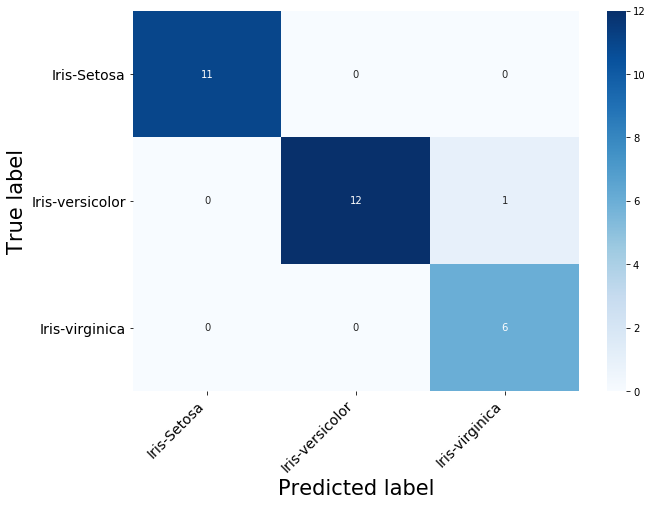

In [0]:
_ = print_confusion_matrix(confusion_matrix=gradient_boosting_cm, class_names=['Iris-Setosa', 'Iris-versicolor', 'Iris-virginica'])

In [0]:
print(classification_report(y_test, gradient_boosting_test_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Confusion Matrix and Classification Report For Random Forest Model

In [0]:
 random_forest_cm = confusion_matrix(y_test, random_forest_test_predictions )

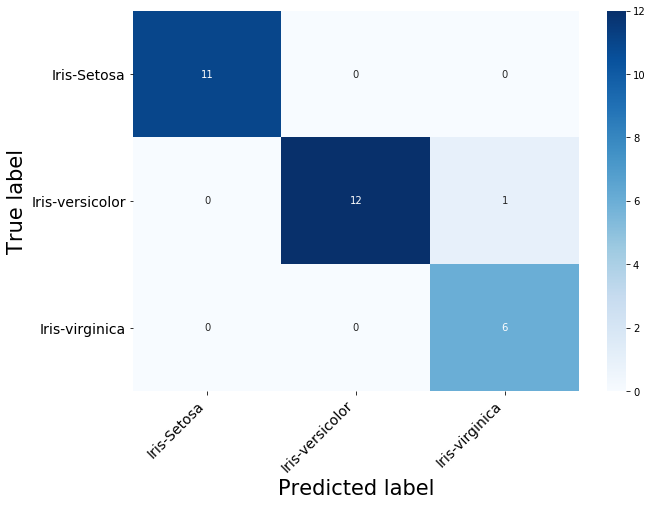

In [0]:
_ = print_confusion_matrix(confusion_matrix=random_forest_cm, class_names=['Iris-Setosa', 'Iris-versicolor', 'Iris-virginica'])

In [0]:
print(classification_report(y_test, random_forest_test_predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



#### What else can you do to boost the model performance?

Iterate:
- Exploratory analysis
- Data cleaning 
- Feature engineering
- Get More Data
- Create a loop to try building models with all combinations of features to find out which features are the most important to accurately predicting the target value 